# Exploratory Analysis

In [1]:
import plotly.express as px
import pandas as pd

### Client

In [86]:
client = pd.read_csv('data/client.csv')
client

product_type  county  eic_count  installed_capacity  is_business  \
0                 1       0        108              952.89            0   
1                 2       0         17              166.40            0   
2                 3       0        688             7207.88            0   
3                 0       0          5              400.00            1   
4                 1       0         43             1411.00            1   
...             ...     ...        ...                 ...          ...   
41914             1      15         51              415.60            0   
41915             3      15        161             2035.75            0   
41916             0      15         15              620.00            1   
41917             1      15         20              624.50            1   
41918             3      15         55             2188.20            1   

             date  data_block_id  
0      2021-09-01              2  
1      2021-09-01              2  
2      2021-09-01              2  
3      2021-09-01              2  
4      2021-09-01              2  
...           ...            ...  
41914  2023-05-29            637  
41915  2023-05-29            637  
41916  2023-05-29            637  
41917  2023-05-29            637  
41918  2023-05-29            637  

[41919 rows x 7 columns]

In [58]:
client.describe()

product_type        county     eic_count  installed_capacity  \
count  41919.000000  41919.000000  41919.000000        41919.000000   
mean       1.898996      7.297097     73.345118         1450.771451   
std        1.081713      4.780750    144.064389         2422.233120   
min        0.000000      0.000000      5.000000            5.500000   
25%        1.000000      3.000000     13.000000          321.900000   
50%        2.000000      7.000000     32.000000          645.200000   
75%        3.000000     11.000000     70.000000         1567.150000   
max        3.000000     15.000000   1517.000000        19314.310000   

        is_business  data_block_id  
count  41919.000000   41919.000000  
mean       0.536773     322.898876  
std        0.498652     182.075724  
min        0.000000       2.000000  
25%        0.000000     167.000000  
50%        1.000000     324.000000  
75%        1.000000     480.000000  
max        1.000000     637.000000

In [60]:
client.isnull().sum()

product_type          0
county                0
eic_count             0
installed_capacity    0
is_business           0
date                  0
data_block_id         0
dtype: int64

### Electricity Prices

In [125]:
elec_prices = pd.read_csv('data/electricity_prices.csv')
elec_prices['forecast_date'] = pd.to_datetime(elec_prices['forecast_date'])
elec_prices['hour_part'] = elec_prices.forecast_date.dt.hour
elec_prices

forecast_date  euros_per_mwh          origin_date  data_block_id  \
0     2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1   
1     2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1   
2     2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1   
3     2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1   
4     2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1   
...                   ...            ...                  ...            ...   
15281 2023-05-30 19:00:00          82.10  2023-05-29 19:00:00            637   
15282 2023-05-30 20:00:00         150.85  2023-05-29 20:00:00            637   
15283 2023-05-30 21:00:00          82.10  2023-05-29 21:00:00            637   
15284 2023-05-30 22:00:00          82.09  2023-05-29 22:00:00            637   
15285 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00            637   

       hour_part  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
15281         19  
15282         20  
15283         21  
15284         22  
15285         23  

[15286 rows x 5 columns]

In [62]:
elec_prices.describe()

euros_per_mwh  data_block_id
count   15286.000000   15286.000000
mean      157.064176     318.990710
std       121.148625     183.890301
min       -10.060000       1.000000
25%        85.290000     160.000000
50%       128.280000     319.000000
75%       199.797500     478.000000
max      4000.000000     637.000000

In [63]:
elec_prices.isnull().sum()

forecast_date    0
euros_per_mwh    0
origin_date      0
data_block_id    0
dtype: int64

C:\Users\mskel\.conda\envs\kaggle310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



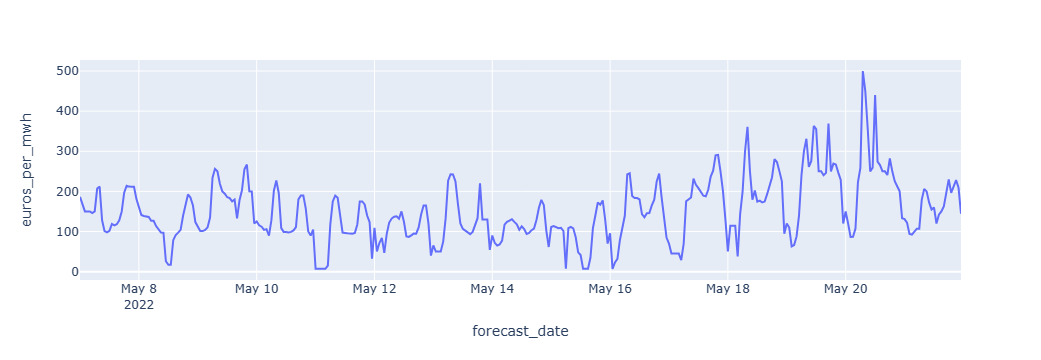

In [136]:
px.line(elec_prices[elec_prices.data_block_id.between(249,263)], x='forecast_date', y='euros_per_mwh')

C:\Users\mskel\.conda\envs\kaggle310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



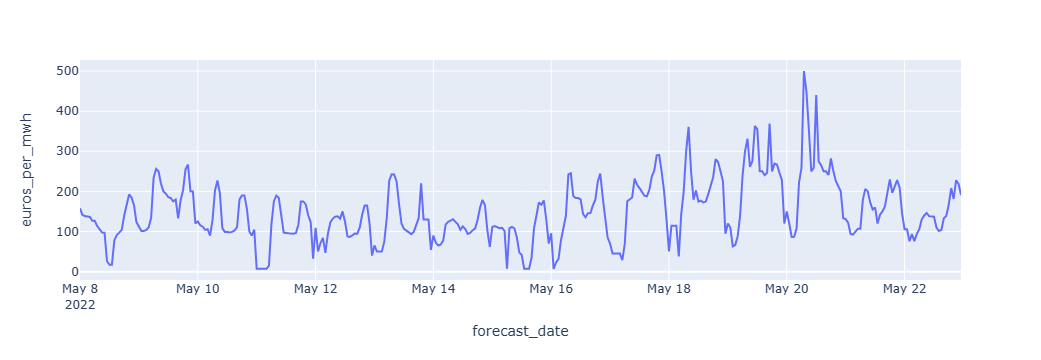

In [137]:
px.line(elec_prices[elec_prices.data_block_id.between(250,264)], x='forecast_date', y='euros_per_mwh')

C:\Users\mskel\.conda\envs\kaggle310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



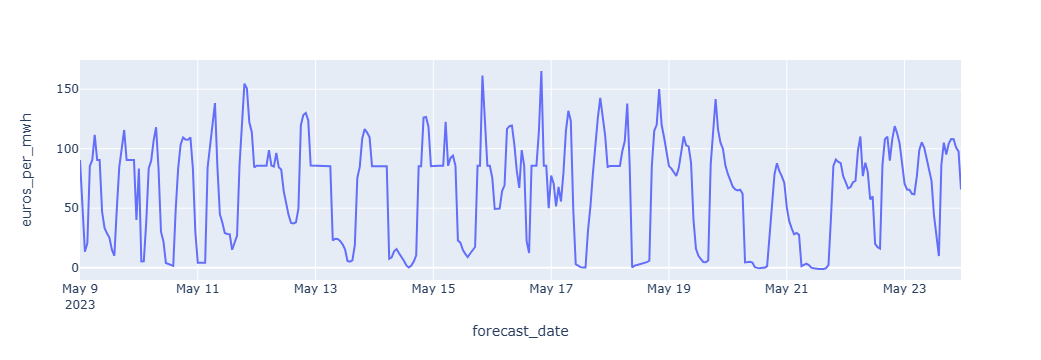

In [138]:
px.line(elec_prices[elec_prices.data_block_id.between(250+366,264+366)], x='forecast_date', y='euros_per_mwh')

### Train

In [4]:
train = pd.read_csv('data/train.csv')
train

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
0        2021-09-01 00:00:00              0        0                   0  
1        2021-09-01 00:00:00              0        1                   0  
2        2021-09-01 00:00:00              0        2                   1  
3        2021-09-01 00:00:00              0        3                   1  
4        2021-09-01 00:00:00              0        4                   2  
...                      ...            ...      ...                 ...  
2018347  2023-05-31 23:00:00            637  2018347                  64  
2018348  2023-05-31 23:00:00            637  2018348                  59  
2018349  2023-05-31 23:00:00            637  2018349                  59  
2018350  2023-05-31 23:00:00            637  2018350                  60  
2018351  2023-05-31 23:00:00            637  2018351                  60  

[2018352 rows x 9 columns]

In [64]:
train.describe()

county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id        row_id  prediction_unit_id  
count   2.018352e+06  2.018352e+06        2.018352e+06  
mean    3.218746e+02  1.009176e+06        3.304538e+01  
std     1.826343e+02  5.826482e+05        1.959059e+01  
min     0.000000e+00  0.000000e+00        0.000000e+00  
25%     1.660000e+02  5.045878e+05        1.600000e+01  
50%     3.230000e+02  1.009176e+06        3.300000e+01  
75%     4.790000e+02  1.513763e+06        5.000000e+01  
max     6.370000e+02  2.018351e+06        6.800000e+01

In [65]:
train.isnull().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [66]:
train[train.target.isnull()]

county  is_business  product_type  target  is_consumption  \
178938        0            0             1     NaN               0   
178939        0            0             1     NaN               1   
178940        0            0             2     NaN               0   
178941        0            0             2     NaN               1   
178942        0            0             3     NaN               0   
...         ...          ...           ...     ...             ...   
1806379      15            1             0     NaN               1   
1806380      15            1             1     NaN               0   
1806381      15            1             1     NaN               1   
1806382      15            1             3     NaN               0   
1806383      15            1             3     NaN               1   

                    datetime  data_block_id   row_id  prediction_unit_id  
178938   2021-10-31 03:00:00             60   178938                   0  
178939   2021-10-31 03:00:00             60   178939                   0  
178940   2021-10-31 03:00:00             60   178940                   1  
178941   2021-10-31 03:00:00             60   178941                   1  
178942   2021-10-31 03:00:00             60   178942                   2  
...                      ...            ...      ...                 ...  
1806379  2023-03-26 03:00:00            571  1806379                  64  
1806380  2023-03-26 03:00:00            571  1806380                  59  
1806381  2023-03-26 03:00:00            571  1806381                  59  
1806382  2023-03-26 03:00:00            571  1806382                  60  
1806383  2023-03-26 03:00:00            571  1806383                  60  

[528 rows x 9 columns]

### Gas Prices

In [5]:
gas_prices = pd.read_csv('data/gas_prices.csv')
gas_prices

forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0      2021-09-01                 45.23                  46.32  2021-08-31   
1      2021-09-02                 45.62                  46.29  2021-09-01   
2      2021-09-03                 45.85                  46.40  2021-09-02   
3      2021-09-04                 46.30                  46.80  2021-09-03   
4      2021-09-05                 46.30                  46.58  2021-09-04   
..            ...                   ...                    ...         ...   
632    2023-05-26                 29.10                  34.10  2023-05-25   
633    2023-05-27                 28.30                  34.10  2023-05-26   
634    2023-05-28                 28.10                  34.10  2023-05-27   
635    2023-05-29                 28.16                  36.98  2023-05-28   
636    2023-05-30                 29.00                  34.00  2023-05-29   

     data_block_id  
0                1  
1                2  
2                3  
3                4  
4                5  
..             ...  
632            633  
633            634  
634            635  
635            636  
636            637  

[637 rows x 5 columns]

In [67]:
gas_prices.describe()

lowest_price_per_mwh  highest_price_per_mwh  data_block_id
count            637.000000             637.000000     637.000000
mean              95.036750             107.754631     319.000000
std               47.552295              54.743666     184.030342
min               28.100000              34.000000       1.000000
25%               60.000000              67.530000     160.000000
50%               85.210000              93.470000     319.000000
75%              109.000000             130.740000     478.000000
max              250.000000             305.000000     637.000000

In [68]:
gas_prices.isnull().sum()

forecast_date            0
lowest_price_per_mwh     0
highest_price_per_mwh    0
origin_date              0
data_block_id            0
dtype: int64

### Weather Mapping

In [160]:
weather_mapping = pd.read_csv('data/weather_station_to_county_mapping.csv')
weather_mapping

county_name  longitude  latitude  county
0           NaN       21.7      57.6     NaN
1           NaN       21.7      57.9     NaN
2           NaN       21.7      58.2     NaN
3           NaN       21.7      58.5     NaN
4           NaN       21.7      58.8     NaN
..          ...        ...       ...     ...
107         NaN       28.2      58.5     NaN
108         NaN       28.2      58.8     NaN
109         NaN       28.2      59.1     NaN
110         NaN       28.2      59.4     NaN
111         NaN       28.2      59.7     NaN

[112 rows x 4 columns]

In [159]:
weather_mapping.dropna().county.value_counts().sort_index()


county
0.0     6
1.0     1
2.0     4
3.0     3
4.0     3
5.0     4
6.0     2
7.0     5
8.0     1
9.0     3
10.0    4
11.0    4
13.0    1
14.0    3
15.0    5
Name: count, dtype: int64

There is no weather station for county id 12. Because county id 12 maps to unknown. We can probably get the average weather across all of estonia for the hour/day and use that as the forecast/historical data for county id 12.

In [166]:
weather_map = pd.concat([weather_mapping, pd.DataFrame({'county_name':['Unknown'], 
                                  'longitude':[24.95],
                                  'latitude': [58.65],
                                  'county': [12]})], ignore_index=True)
weather_map

county_name  longitude  latitude  county
0           NaN      21.70     57.60     NaN
1           NaN      21.70     57.90     NaN
2           NaN      21.70     58.20     NaN
3           NaN      21.70     58.50     NaN
4           NaN      21.70     58.80     NaN
..          ...        ...       ...     ...
108         NaN      28.20     58.80     NaN
109         NaN      28.20     59.10     NaN
110         NaN      28.20     59.40     NaN
111         NaN      28.20     59.70     NaN
112     Unknown      24.95     58.65    12.0

[113 rows x 4 columns]

### Historical Weather

In [6]:
historical_weather = pd.read_csv('data/historical_weather.csv')
historical_weather

datetime  temperature  dewpoint  rain  snowfall  \
0        2021-09-01 00:00:00         14.2      11.6   0.0       0.0   
1        2021-09-01 00:00:00         13.9      11.5   0.0       0.0   
2        2021-09-01 00:00:00         14.0      12.5   0.0       0.0   
3        2021-09-01 00:00:00         14.6      11.5   0.0       0.0   
4        2021-09-01 00:00:00         15.7      12.9   0.0       0.0   
...                      ...          ...       ...   ...       ...   
1710797  2023-05-30 10:00:00         11.7       4.6   0.0       0.0   
1710798  2023-05-30 10:00:00         12.3       3.5   0.0       0.0   
1710799  2023-05-30 10:00:00          9.8       3.0   0.0       0.0   
1710800  2023-05-30 10:00:00         11.7       1.6   0.0       0.0   
1710801  2023-05-30 10:00:00         12.0       1.4   0.0       0.0   

         surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0                  1015.9                31              31               0   
1                  1010.7                33              37               0   
2                  1015.0                31              34               0   
3                  1017.3                 0               0               0   
4                  1014.0                22              25               0   
...                   ...               ...             ...             ...   
1710797            1018.9                40               9              54   
1710798            1019.0                46               4              70   
1710799            1019.2                41               4              62   
1710800            1019.0                44               0              73   
1710801            1016.1                38               0              63   

         cloudcover_high  windspeed_10m  winddirection_10m  \
0                     11       7.083333                  8   
1                      0       5.111111                359   
2                      0       6.333333                355   
3                      0       8.083333                297   
4                      0       8.416667                  5   
...                  ...            ...                ...   
1710797                0       1.055556                253   
1710798                0       0.805556                263   
1710799                0       1.972222                285   
1710800                0       3.500000                307   
1710801                0       3.250000                304   

         shortwave_radiation  direct_solar_radiation  diffuse_radiation  \
0                        0.0                     0.0                0.0   
1                        0.0                     0.0                0.0   
2                        0.0                     0.0                0.0   
3                      358.0                   277.0               81.0   
4                        0.0                     0.0                0.0   
...                      ...                     ...                ...   
1710797                567.0                   392.0              175.0   
1710798                581.0                   407.0              174.0   
1710799                609.0                   432.0              177.0   
1710800                658.0                   521.0              137.0   
1710801                672.0                   550.0              122.0   

         latitude  longitude  data_block_id  
0            57.6       21.7            1.0  
1            57.6       22.2            1.0  
2            57.6       22.7            1.0  
3            57.6       23.2            1.0  
4            57.6       23.7            1.0  
...           ...        ...            ...  
1710797      59.7       26.2          637.0  
1710798      59.7       26.7          637.0  
1710799      59.7       27.2          637.0  
1710800      59.7       27.7          637.0  
1710801      59.7       28.2          637.0  

[1710802 rows x 18 

In [69]:
historical_weather.describe()

temperature      dewpoint          rain      snowfall  \
count  1.710802e+06  1.710802e+06  1.710802e+06  1.710802e+06   
mean   5.740968e+00  2.240312e+00  4.962012e-02  1.604896e-02   
std    8.025647e+00  7.224357e+00  2.079113e-01  7.462936e-02   
min   -2.370000e+01 -2.590000e+01  0.000000e+00  0.000000e+00   
25%    0.000000e+00 -2.600000e+00  0.000000e+00  0.000000e+00   
50%    5.100000e+00  1.700000e+00  0.000000e+00  0.000000e+00   
75%    1.120000e+01  7.200000e+00  0.000000e+00  0.000000e+00   
max    3.260000e+01  2.380000e+01  1.680000e+01  2.660000e+00   

       surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
count      1.710802e+06      1.710802e+06    1.710802e+06    1.710802e+06   
mean       1.009282e+03      6.091270e+01    4.668593e+01    3.440698e+01   
std        1.308891e+01      3.776905e+01    4.074760e+01    3.832769e+01   
min        9.429000e+02      0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.001500e+03      2.500000e+01    3.000000e+00    0.000000e+00   
50%        1.010400e+03      7.200000e+01    3.900000e+01    1.600000e+01   
75%        1.018000e+03      1.000000e+02    9.400000e+01    7.200000e+01   
max        1.049300e+03      1.000000e+02    1.000000e+02    1.000000e+02   

       cloudcover_high  windspeed_10m  winddirection_10m  shortwave_radiation  \
count     1.710802e+06   1.710802e+06       1.710802e+06         1.710802e+06   
mean      3.605141e+01   4.849871e+00       1.978694e+02         1.064905e+02   
std       4.135852e+01   2.475450e+00       8.993798e+01         1.799449e+02   
min       0.000000e+00   0.000000e+00       0.000000e+00         0.000000e+00   
25%       0.000000e+00   3.000000e+00       1.390000e+02         0.000000e+00   
50%       1.000000e+01   4.500000e+00       2.080000e+02         1.000000e+00   
75%       8.500000e+01   6.277778e+00       2.630000e+02         1.400000e+02   
max       1.000000e+02   2.175000e+01       3.600000e+02         8.490000e+02   

       direct_solar_radiation  diffuse_radiation      latitude     longitude  \
count            1.710802e+06       1.710802e+06  1.710802e+06  1.710802e+06   
mean             6.445292e+01       4.203759e+01  5.865000e+01  2.495000e+01   
std              1.334100e+02       6.195225e+01  6.873871e-01  2.015564e+00   
min              0.000000e+00       0.000000e+00  5.760000e+01  2.170000e+01   
25%              0.000000e+00       0.000000e+00  5.790000e+01  2.320000e+01   
50%              0.000000e+00       1.000000e+00  5.850000e+01  2.470000e+01   
75%              4.700000e+01       7.400000e+01  5.910000e+01  2.670000e+01   
max              7.540000e+02       3.880000e+02  5.970000e+01  2.820000e+01   

       data_block_id  
count   1.710802e+06  
mean    3.192708e+02  
std     1.837298e+02  
min     1.000000e+00  
25%     1.600000e+02  
50%     3.190000e+02  
75%     4.780000e+02  
max     6.370000e+02

In [70]:
historical_weather.isnull().sum()

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64

In [178]:
# County id 12:

historical_12 = historical_weather.groupby('datetime').mean().reset_index()

historical_weather = pd.concat([historical_weather, historical_12], ignore_index=True)
historical_weather

datetime  temperature   dewpoint      rain  snowfall  \
0        2021-09-01 00:00:00    14.200000  11.600000  0.000000       0.0   
1        2021-09-01 00:00:00    13.900000  11.500000  0.000000       0.0   
2        2021-09-01 00:00:00    14.000000  12.500000  0.000000       0.0   
3        2021-09-01 00:00:00    14.600000  11.500000  0.000000       0.0   
4        2021-09-01 00:00:00    15.700000  12.900000  0.000000       0.0   
...                      ...          ...        ...       ...       ...   
1726072  2023-05-30 06:00:00     9.983036   4.412500  0.011607       0.0   
1726073  2023-05-30 07:00:00    10.804464   4.183929  0.050000       0.0   
1726074  2023-05-30 08:00:00    11.506250   4.254464  0.033036       0.0   
1726075  2023-05-30 09:00:00    11.963393   4.502679  0.043750       0.0   
1726076  2023-05-30 10:00:00    12.514286   4.309821  0.026786       0.0   

         surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
0             1015.900000         31.000000       31.000000        0.000000   
1             1010.700000         33.000000       37.000000        0.000000   
2             1015.000000         31.000000       34.000000        0.000000   
3             1017.300000          0.000000        0.000000        0.000000   
4             1014.000000         22.000000       25.000000        0.000000   
...                   ...               ...             ...             ...   
1726072       1014.104464         34.383929        3.464286       49.598214   
1726073       1014.396429         29.651786        2.580357       44.517857   
1726074       1014.678571         27.732143        2.705357       41.750000   
1726075       1014.859821         28.214286        4.919643       39.276786   
1726076       1015.286607         34.937500       14.616071       35.803571   

         cloudcover_high  windspeed_10m  winddirection_10m  \
0              11.000000       7.083333           8.000000   
1               0.000000       5.111111         359.000000   
2               0.000000       6.333333         355.000000   
3               0.000000       8.083333         297.000000   
4               0.000000       8.416667           5.000000   
...                  ...            ...                ...   
1726072         5.071429       3.012401         262.357143   
1726073         2.062500       3.203125         274.732143   
1726074         0.830357       3.423363         287.562500   
1726075         1.026786       3.791171         298.250000   
1726076         0.883929       4.297371         302.616071   

         shortwave_radiation  direct_solar_radiation  diffuse_radiation  \
0                   0.000000                0.000000           0.000000   
1                   0.000000                0.000000           0.000000   
2                   0.000000                0.000000           0.000000   
3                 358.000000              277.000000          81.000000   
4                   0.000000                0.000000           0.000000   
...                      ...                     ...                ...   
1726072            94.741071               26.017857          68.723214   
1726073           199.991071               96.491071         103.500000   
1726074           338.669643              203.044643         135.625000   
1726075           455.508929              308.785714         146.723214   
1726076           546.053571              379.392857         166.660714   

         latitude  longitude  data_block_id  
0           57.60      21.70            1.0  
1           57.60      22.20            1.0  
2           57.60      22.70            1.0  
3           57.60      23.20            1.0  
4           57.60      23.70            1.0  
...           ...        ...            ...  
1726072     58.65      24.95          637.0  
1726073     58.65      24.95          637.0  
1726074     58.65      24.95          637.0  
1726075     58.65      24.95          637.0  
172607

### Forecast Weather

In [170]:
forecast_weather = pd.read_csv('data/forecast_weather.csv')
forecast_weather['forecast_datetime'] = pd.to_datetime(forecast_weather['forecast_datetime'])
forecast_weather['origin_datetime'] = pd.to_datetime(forecast_weather['origin_datetime'])
forecast_weather

latitude  longitude     origin_datetime  hours_ahead  temperature  \
0            57.6       21.7 2021-09-01 02:00:00            1    15.655786   
1            57.6       22.2 2021-09-01 02:00:00            1    13.003931   
2            57.6       22.7 2021-09-01 02:00:00            1    14.206567   
3            57.6       23.2 2021-09-01 02:00:00            1    14.844507   
4            57.6       23.7 2021-09-01 02:00:00            1    15.293848   
...           ...        ...                 ...          ...          ...   
3424507      59.7       26.2 2023-05-30 02:00:00           48    10.150049   
3424508      59.7       26.7 2023-05-30 02:00:00           48    10.259790   
3424509      59.7       27.2 2023-05-30 02:00:00           48    10.467798   
3424510      59.7       27.7 2023-05-30 02:00:00           48    10.694116   
3424511      59.7       28.2 2023-05-30 02:00:00           48    11.233179   

          dewpoint  cloudcover_high  cloudcover_low  cloudcover_mid  \
0        11.553613         0.904816        0.019714        0.000000   
1        10.689844         0.886322        0.004456        0.000000   
2        11.671777         0.729034        0.005615        0.000000   
3        12.264917         0.336304        0.074341        0.000626   
4        12.458887         0.102875        0.088074        0.000015   
...            ...              ...             ...             ...   
3424507   5.662744         0.061066        0.257339        0.004059   
3424508   5.922754         0.107880        0.895203        0.198700   
3424509   6.072534         0.000000        0.387466        0.448853   
3424510   7.009058         0.000000        0.505936        0.997314   
3424511   7.069238         0.703461        0.292313        0.934021   

         cloudcover_total  10_metre_u_wind_component  \
0                0.905899                  -0.411328   
1                0.886658                   0.206347   
2                0.730499                   1.451587   
3                0.385468                   1.090869   
4                0.176590                   1.268481   
...                   ...                        ...   
3424507          0.308594                   6.890626   
3424508          0.906036                   6.890626   
3424509          0.530518                   6.214112   
3424510          0.997498                   5.810060   
3424511          0.989716                   2.719728   

         10_metre_v_wind_component  data_block_id   forecast_datetime  \
0                        -9.106137              1 2021-09-01 03:00:00   
1                        -5.355405              1 2021-09-01 03:00:00   
2                        -7.417905              1 2021-09-01 03:00:00   
3                        -9.163999              1 2021-09-01 03:00:00   
4                        -8.975766              1 2021-09-01 03:00:00   
...                            ...            ...                 ...   
3424507                  -3.258144            637 2023-06-01 02:00:00   
3424508                  -3.768032            637 2023-06-01 02:00:00   
3424509                  -4.700405            637 2023-06-01 02:00:00   
3424510                  -4.338345            637 2023-06-01 02:00:00   
3424511                  -0.922939            637 2023-06-01 02:00:00   

         direct_solar_radiation  surface_solar_radiation_downwards  snowfall  \
0                           0.0                                0.0       0.0   
1                           0.0                                0.0       0.0   
2                           0.0                                0.0       0.0   
3                           0.0                                0.0       0.0   
4                           0.0                                0.0       0.0   
...                         ...                                ...       ...   
3424507                     0.0                                0.0       0.0   
3424508                     0

In [171]:
forecast_weather.describe()

latitude     longitude                origin_datetime  \
count  3.424512e+06  3.424512e+06                        3424512   
mean   5.865000e+01  2.495000e+01  2022-07-16 01:32:18.461540352   
min    5.760000e+01  2.170000e+01            2021-09-01 02:00:00   
25%    5.812500e+01  2.320000e+01            2022-02-07 01:00:00   
50%    5.865000e+01  2.495000e+01            2022-07-16 02:00:00   
75%    5.917500e+01  2.670000e+01            2022-12-22 01:00:00   
max    5.970000e+01  2.820000e+01            2023-05-30 02:00:00   
std    6.873865e-01  2.015565e+00                            NaN   

        hours_ahead   temperature      dewpoint  cloudcover_high  \
count  3.424512e+06  3.424512e+06  3.424512e+06     3.424512e+06   
mean   2.450000e+01  5.743913e+00  2.411946e+00     3.946654e-01   
min    1.000000e+00 -2.749940e+01 -2.968357e+01     0.000000e+00   
25%    1.275000e+01  2.606445e-01 -2.364355e+00     0.000000e+00   
50%    2.450000e+01  4.872705e+00  1.835596e+00     8.866882e-02   
75%    3.625000e+01  1.114639e+01  7.302026e+00     9.784851e-01   
max    4.800000e+01  3.181069e+01  2.368057e+01     1.000008e+00   
std    1.385340e+01  7.844206e+00  7.121432e+00     4.440425e-01   

       cloudcover_low  cloudcover_mid  cloudcover_total  \
count    3.424512e+06    3.424512e+06      3.424512e+06   
mean     4.346453e-01    3.590693e-01      6.819927e-01   
min      0.000000e+00    0.000000e+00      0.000000e+00   
25%      3.356934e-04    0.000000e+00      2.648926e-01   
50%      2.305453e-01    1.011963e-01      9.772670e-01   
75%      9.994587e-01    9.000854e-01      1.000000e+00   
max      1.000008e+00    1.000008e+00      1.000008e+00   
std      4.386346e-01    4.201556e-01      4.009629e-01   

       10_metre_u_wind_component  10_metre_v_wind_component  data_block_id  \
count               3.424512e+06               3.424512e+06   3.424512e+06   
mean                1.255446e+00               7.250110e-01   3.190000e+02   
min                -1.757718e+01              -2.211612e+01   1.000000e+00   
25%                -1.466691e+00              -1.978108e+00   1.600000e+02   
50%                 1.468681e+00               9.433203e-01   3.190000e+02   
75%                 3.813533e+00               3.507629e+00   4.780000e+02   
max                 2.257320e+01               1.931437e+01   6.370000e+02   
std                 3.995300e+00               4.223752e+00   1.838859e+02   

                   forecast_datetime  direct_solar_radiation  \
count                        3424512            3.424512e+06   
mean   2022-07-17 02:02:18.461538304            1.511882e+02   
min              2021-09-01 03:00:00           -7.733333e-01   
25%              2022-02-07 19:45:00            0.000000e+00   
50%              2022-07-17 02:30:00            0.000000e+00   
75%              2022-12-23 07:15:00            2.128447e+02   
max              2023-06-01 02:00:00            9.544222e+02   
std                              NaN            2.565069e+02   

       surface_solar_radiation_downwards      snowfall  total_precipitation  
count                       3.424510e+06  3.424512e+06         3.424512e+06  
mean                        1.107642e+02  2.533923e-05         7.863859e-05  
min                        -3.258333e-01 -3.814697e-06        -1.529098e-05  
25%                         0.000000e+00  0.000000e+00         0.000000e+00  
50%                         6.044444e-01  0.000000e+00         0.000000e+00  
75%                         1.441723e+02  0.000000e+00         2.765656e-05  
max                         8.487144e+02  4.832983e-03         1.651621e-02  
std                         1.874444e+02  1.222840e-04         2.780880e-04

In [172]:
forecast_weather.isnull().sum()

latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwards    2
snowfall                             0
total_precipitation                  0
dtype: int64

In [176]:
# County id 12:

forecast_12 = forecast_weather.groupby('forecast_datetime').mean().reset_index()

forecast_weather = pd.concat([forecast_weather, forecast_12], ignore_index=True)
forecast_weather

latitude  longitude     origin_datetime  hours_ahead  temperature  \
0           57.60      21.70 2021-09-01 02:00:00          1.0    15.655786   
1           57.60      22.20 2021-09-01 02:00:00          1.0    13.003931   
2           57.60      22.70 2021-09-01 02:00:00          1.0    14.206567   
3           57.60      23.20 2021-09-01 02:00:00          1.0    14.844507   
4           57.60      23.70 2021-09-01 02:00:00          1.0    15.293848   
...           ...        ...                 ...          ...          ...   
3439817     58.65      24.95 2023-05-30 02:00:00         44.0    11.729009   
3439818     58.65      24.95 2023-05-30 02:00:00         45.0    11.137857   
3439819     58.65      24.95 2023-05-30 02:00:00         46.0    10.659773   
3439820     58.65      24.95 2023-05-30 02:00:00         47.0    10.236302   
3439821     58.65      24.95 2023-05-30 02:00:00         48.0     9.847245   

          dewpoint  cloudcover_high  cloudcover_low  cloudcover_mid  \
0        11.553613         0.904816        0.019714        0.000000   
1        10.689844         0.886322        0.004456        0.000000   
2        11.671777         0.729034        0.005615        0.000000   
3        12.264917         0.336304        0.074341        0.000626   
4        12.458887         0.102875        0.088074        0.000015   
...            ...              ...             ...             ...   
3439817   5.960873         0.416247        0.020762        0.027475   
3439818   5.725789         0.504970        0.016986        0.031082   
3439819   5.493812         0.394751        0.016852        0.030581   
3439820   5.293022         0.309380        0.021396        0.034688   
3439821   5.092237         0.287090        0.040319        0.039391   

         cloudcover_total  10_metre_u_wind_component  \
0                0.905899                  -0.411328   
1                0.886658                   0.206347   
2                0.730499                   1.451587   
3                0.385468                   1.090869   
4                0.176590                   1.268481   
...                   ...                        ...   
3439817          0.456015                   4.466787   
3439818          0.526855                   4.432824   
3439819          0.397820                   4.368315   
3439820          0.317103                   4.359639   
3439821          0.334437                   4.352486   

         10_metre_v_wind_component  data_block_id   forecast_datetime  \
0                        -9.106137            1.0 2021-09-01 03:00:00   
1                        -5.355405            1.0 2021-09-01 03:00:00   
2                        -7.417905            1.0 2021-09-01 03:00:00   
3                        -9.163999            1.0 2021-09-01 03:00:00   
4                        -8.975766            1.0 2021-09-01 03:00:00   
...                            ...            ...                 ...   
3439817                  -2.069000          637.0 2023-05-31 22:00:00   
3439818                  -2.405810          637.0 2023-05-31 23:00:00   
3439819                  -2.626136          637.0 2023-06-01 00:00:00   
3439820                  -2.748081          637.0 2023-06-01 01:00:00   
3439821                  -2.895620          637.0 2023-06-01 02:00:00   

         direct_solar_radiation  surface_solar_radiation_downwards  snowfall  \
0                      0.000000                           0.000000       0.0   
1                      0.000000                           0.000000       0.0   
2                      0.000000                           0.000000       0.0   
3                      0.000000                           0.000000       0.0   
4                      0.000000                           0.000000       0.0   
...                         ...                                ...       ...   
3439817                3.715556                           0.413333       0.0   
3439818                0.0107

## Let's look at a single data block

In [8]:
train[train['data_block_id'] == 4]

county  is_business  product_type   target  is_consumption  \
11712       0            0             1    0.930               0   
11713       0            0             1  123.214               1   
11714       0            0             2    0.000               0   
11715       0            0             2   21.940               1   
11716       0            0             3    1.611               0   
...       ...          ...           ...      ...             ...   
14635      15            0             3   74.459               1   
14636      15            1             1    0.000               0   
14637      15            1             1   20.011               1   
14638      15            1             3    0.000               0   
14639      15            1             3  269.096               1   

                  datetime  data_block_id  row_id  prediction_unit_id  
11712  2021-09-05 00:00:00              4   11712                   0  
11713  2021-09-05 00:00:00              4   11713                   0  
11714  2021-09-05 00:00:00              4   11714                   1  
11715  2021-09-05 00:00:00              4   11715                   1  
11716  2021-09-05 00:00:00              4   11716                   2  
...                    ...            ...     ...                 ...  
14635  2021-09-05 23:00:00              4   14635                  58  
14636  2021-09-05 23:00:00              4   14636                  59  
14637  2021-09-05 23:00:00              4   14637                  59  
14638  2021-09-05 23:00:00              4   14638                  60  
14639  2021-09-05 23:00:00              4   14639                  60  

[2928 rows x 9 columns]

### Takeaways about what we're predicting

We are predicting the 'target' variable for is_consumption 0,1 for a number of different groupings. The groupings are based on county, is_business, and product_type. So basically, they want different predictions for each county, for business and personal customers, and for each of their different product types - but not for individual clients. Which makes sense, actually.

But. That means I should pay particular attention to county, is_business, product_type, and is_consumption - basically as the composite primary key for each prediction. That also means that for things like clients in the same county or whatever, we can aggregate their usage - or maybe it's already aggregated? I'll have to have a look.

In [9]:
client[(client.data_block_id == 2) & (client.county == 0)]

product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   
5             3       0        265            13417.79            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2  
5  2021-09-01              2

Indeed it is aggregated.

Let's have a look at clients over time

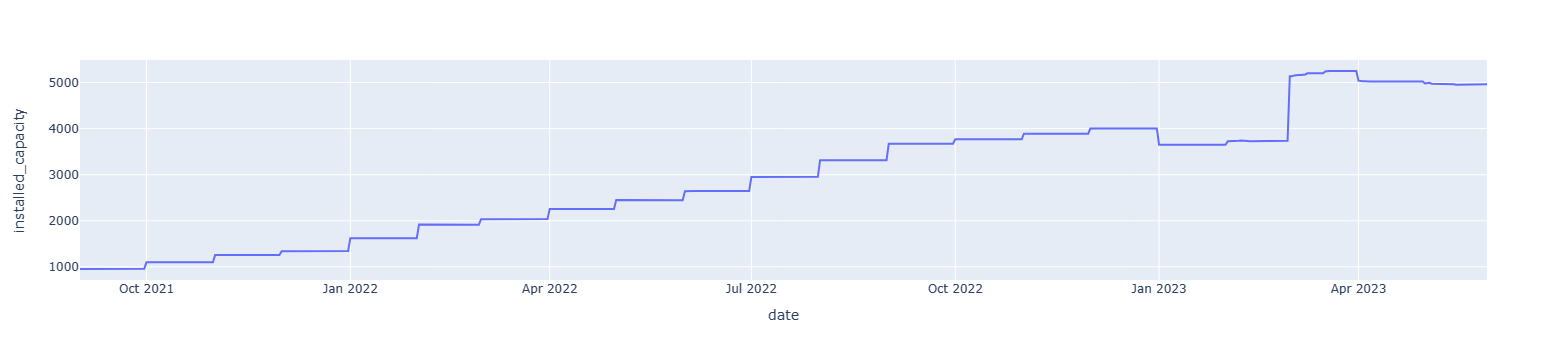

In [18]:
tmp_client = client[(client.product_type == 1) & (client.county == 0) & (client.is_business == 0)]
tmp_client
px.line(tmp_client, x='date', y='installed_capacity')

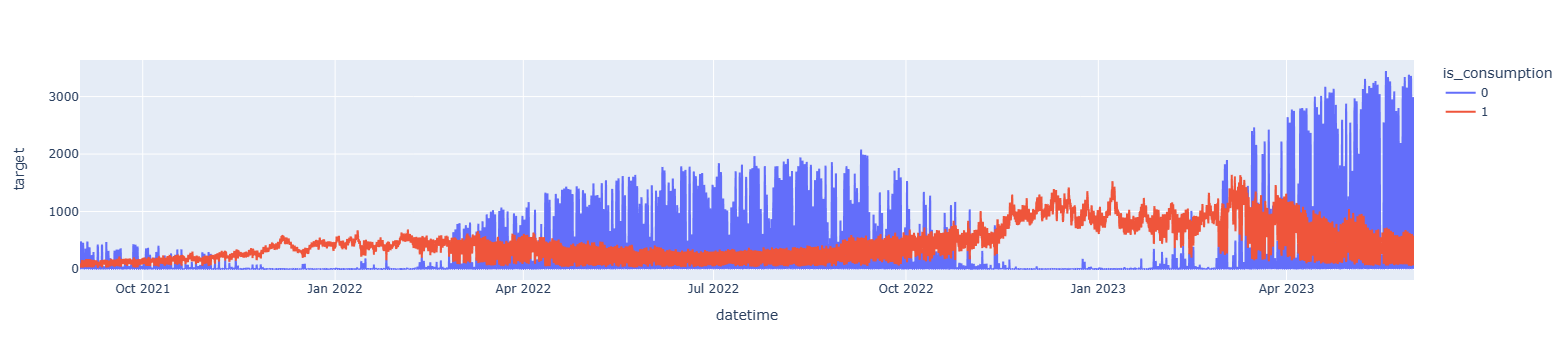

In [15]:
tmp_train = train[(train.product_type == 1) & (train.county == 0) & (train.is_business == 0)]
px.line(tmp_train, x='datetime', y='target', color=tmp_train.is_consumption)

I read on kaggle a nice way to normalise against the upwards creep of the data is to divide target by installed_capacity. Let's try that and see what happens

In [41]:
tmp_train['datetime'] = pd.to_datetime(tmp_train['datetime'])
tmp_train['merge_date'] = tmp_train.datetime.dt.date #.astype(str).str.cat([tmp_train.county.astype(str),tmp_train.is_business.astype(str), tmp_train.product_type.astype(str)], sep='-')
tmp_train

C:\Users\mskel\AppData\Local\Temp\ipykernel_23824\2364790627.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mskel\AppData\Local\Temp\ipykernel_23824\2364790627.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
122           0            0             1    1.132               0   
123           0            0             1   77.691               1   
244           0            0             1    0.490               0   
...         ...          ...           ...      ...             ...   
2017963       0            0             1  569.301               1   
2018092       0            0             1    5.086               0   
2018093       0            0             1  577.499               1   
2018222       0            0             1    2.921               0   
2018223       0            0             1  544.221               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
122     2021-09-01 01:00:00              0      122                   0   
123     2021-09-01 01:00:00              0      123                   0   
244     2021-09-01 02:00:00              0      244                   0   
...                     ...            ...      ...                 ...   
2017963 2023-05-31 21:00:00            637  2017963                   0   
2018092 2023-05-31 22:00:00            637  2018092                   0   
2018093 2023-05-31 22:00:00            637  2018093                   0   
2018222 2023-05-31 23:00:00            637  2018222                   0   
2018223 2023-05-31 23:00:00            637  2018223                   0   

         merge_date  
0        2021-09-01  
1        2021-09-01  
122      2021-09-01  
123      2021-09-01  
244      2021-09-01  
...             ...  
2017963  2023-05-31  
2018092  2023-05-31  
2018093  2023-05-31  
2018222  2023-05-31  
2018223  2023-05-31  

[30624 rows x 10 columns]

In [42]:
tmp_client['date'] = pd.to_datetime(tmp_client.date).dt.date
tmp_client

C:\Users\mskel\AppData\Local\Temp\ipykernel_23824\343545601.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



product_type  county  eic_count  installed_capacity  is_business  \
0                 1       0        108             952.890            0   
61                1       0        108             952.890            0   
122               1       0        108             952.890            0   
183               1       0        108             952.890            0   
244               1       0        108             952.890            0   
...             ...     ...        ...                 ...          ...   
41591             1       0        508            4968.215            0   
41657             1       0        507            4960.215            0   
41723             1       0        507            4960.215            0   
41789             1       0        508            4964.215            0   
41854             1       0        508            4964.215            0   

             date  data_block_id  
0      2021-09-01              2  
61     2021-09-02              3  
122    2021-09-03              4  
183    2021-09-04              5  
244    2021-09-05              6  
...           ...            ...  
41591  2023-05-25            633  
41657  2023-05-26            634  
41723  2023-05-27            635  
41789  2023-05-28            636  
41854  2023-05-29            637  

[636 rows x 7 columns]

In [46]:
tmp_train.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id',
       'merge_date'],
      dtype='object')

In [49]:
tmp_merge = tmp_train.merge(tmp_client, left_on='merge_date', right_on='date', suffixes=(None, '_r'))
tmp_merge = tmp_merge[['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id',
       'merge_date', 'eic_count', 'installed_capacity']]
tmp_merge

county  is_business  product_type   target  is_consumption  \
0           0            0             1    0.713               0   
1           0            0             1   96.590               1   
2           0            0             1    1.132               0   
3           0            0             1   77.691               1   
4           0            0             1    0.490               0   
...       ...          ...           ...      ...             ...   
30523       0            0             1  580.554               1   
30524       0            0             1    2.787               0   
30525       0            0             1  624.870               1   
30526       0            0             1    3.215               0   
30527       0            0             1  523.269               1   

                 datetime  data_block_id   row_id  prediction_unit_id  \
0     2021-09-01 00:00:00              0        0                   0   
1     2021-09-01 00:00:00              0        1                   0   
2     2021-09-01 01:00:00              0      122                   0   
3     2021-09-01 01:00:00              0      123                   0   
4     2021-09-01 02:00:00              0      244                   0   
...                   ...            ...      ...                 ...   
30523 2023-05-29 21:00:00            635  2011723                   0   
30524 2023-05-29 22:00:00            635  2011852                   0   
30525 2023-05-29 22:00:00            635  2011853                   0   
30526 2023-05-29 23:00:00            635  2011982                   0   
30527 2023-05-29 23:00:00            635  2011983                   0   

       merge_date  eic_count  installed_capacity  
0      2021-09-01        108             952.890  
1      2021-09-01        108             952.890  
2      2021-09-01        108             952.890  
3      2021-09-01        108             952.890  
4      2021-09-01        108             952.890  
...           ...        ...                 ...  
30523  2023-05-29        508            4964.215  
30524  2023-05-29        508            4964.215  
30525  2023-05-29        508            4964.215  
30526  2023-05-29        508            4964.215  
30527  2023-05-29        508            4964.215  

[30528 rows x 12 columns]

In [50]:
tmp_merge['target_installed_capacity'] = tmp_merge.target/tmp_merge.installed_capacity

C:\Users\mskel\.conda\envs\kaggle310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



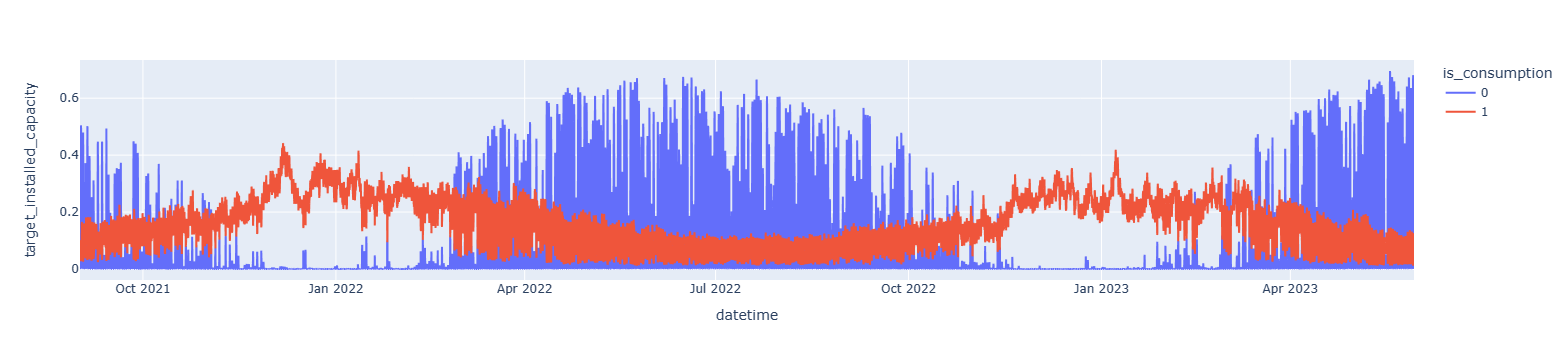

In [52]:
px.line(tmp_merge, x='datetime', y='target_installed_capacity', color=tmp_merge.is_consumption)

# Joining Data

I think we have to inspect each dataframe to see how we can join them all to train.

- Train data: Create a date column, hour_part column
- Client data: Join on data_block_id, county, is_business, and product_type
- Electricity prices: Create a column called hour_part, join on block_id, hour_part. We have access to all the day's electricity prices I think, but the predicted price for the same hour is probably the most useful, even if it is yesterday's predicted price.
- Gas prices: Join on data_block_id. Gas prices give a high and low value for a single day.
- Historical Weather: Make sure you've added the mean for each hour for county id 12. Then join weather_map.

In [119]:
merge = train.copy()
merge['datetime'] = pd.to_datetime(merge.datetime)
merge['date'] = merge.datetime.dt.date #.astype(str).str.cat([merge.county.astype(str),merge.is_business.astype(str), merge.product_type.astype(str)], sep='-')
merge['hour_part'] = merge.datetime.dt.hour
merge

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
2       2021-09-01 00:00:00              0        2                   1   
3       2021-09-01 00:00:00              0        3                   1   
4       2021-09-01 00:00:00              0        4                   2   
...                     ...            ...      ...                 ...   
2018347 2023-05-31 23:00:00            637  2018347                  64   
2018348 2023-05-31 23:00:00            637  2018348                  59   
2018349 2023-05-31 23:00:00            637  2018349                  59   
2018350 2023-05-31 23:00:00            637  2018350                  60   
2018351 2023-05-31 23:00:00            637  2018351                  60   

               date  hour_part  
0        2021-09-01          0  
1        2021-09-01          0  
2        2021-09-01          0  
3        2021-09-01          0  
4        2021-09-01          0  
...             ...        ...  
2018347  2023-05-31         23  
2018348  2023-05-31         23  
2018349  2023-05-31         23  
2018350  2023-05-31         23  
2018351  2023-05-31         23  

[2018352 rows x 11 columns]

In [139]:
# adding client
client['date'] = pd.to_datetime(client.date).dt.date
# client['merge_date'] = client.date.astype(str).str.cat([client.county.astype(str),client.is_business.astype(str), client.product_type.astype(str)], sep='-')
#client

In [123]:
merge1 = merge.merge(client, how='left', on=['product_type', 'county', 'is_business', 'data_block_id'], suffixes=('_train', '_client'))
merge1

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
2       2021-09-01 00:00:00              0        2                   1   
3       2021-09-01 00:00:00              0        3                   1   
4       2021-09-01 00:00:00              0        4                   2   
...                     ...            ...      ...                 ...   
2018347 2023-05-31 23:00:00            637  2018347                  64   
2018348 2023-05-31 23:00:00            637  2018348                  59   
2018349 2023-05-31 23:00:00            637  2018349                  59   
2018350 2023-05-31 23:00:00            637  2018350                  60   
2018351 2023-05-31 23:00:00            637  2018351                  60   

         date_train  hour_part  eic_count  installed_capacity date_client  
0        2021-09-01          0        NaN                 NaN         NaN  
1        2021-09-01          0        NaN                 NaN         NaN  
2        2021-09-01          0        NaN                 NaN         NaN  
3        2021-09-01          0        NaN                 NaN         NaN  
4        2021-09-01          0        NaN                 NaN         NaN  
...             ...        ...        ...                 ...         ...  
2018347  2023-05-31         23       15.0               620.0  2023-05-29  
2018348  2023-05-31         23       20.0               624.5  2023-05-29  
2018349  2023-05-31         23       20.0               624.5  2023-05-29  
2018350  2023-05-31         23       55.0              2188.2  2023-05-29  
2018351  2023-05-31         23       55.0              2188.2  2023-05-29  

[2018352 rows x 14 columns]

In [141]:
merge1.isna().sum()

county                   0
is_business              0
product_type             0
target                 528
is_consumption           0
datetime                 0
data_block_id            0
row_id                   0
prediction_unit_id       0
date_train               0
hour_part                0
eic_count             8640
installed_capacity    8640
date_client           8640
dtype: int64

In [140]:
elec_prices

forecast_date  euros_per_mwh          origin_date  data_block_id  \
0     2021-09-01 00:00:00          92.51  2021-08-31 00:00:00              1   
1     2021-09-01 01:00:00          88.90  2021-08-31 01:00:00              1   
2     2021-09-01 02:00:00          87.35  2021-08-31 02:00:00              1   
3     2021-09-01 03:00:00          86.88  2021-08-31 03:00:00              1   
4     2021-09-01 04:00:00          88.43  2021-08-31 04:00:00              1   
...                   ...            ...                  ...            ...   
15281 2023-05-30 19:00:00          82.10  2023-05-29 19:00:00            637   
15282 2023-05-30 20:00:00         150.85  2023-05-29 20:00:00            637   
15283 2023-05-30 21:00:00          82.10  2023-05-29 21:00:00            637   
15284 2023-05-30 22:00:00          82.09  2023-05-29 22:00:00            637   
15285 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00            637   

       hour_part  
0              0  
1              1  
2              2  
3              3  
4              4  
...          ...  
15281         19  
15282         20  
15283         21  
15284         22  
15285         23  

[15286 rows x 5 columns]

In [142]:
merge2 = merge1.merge(elec_prices, how='left', on=['data_block_id', 'hour_part'], suffixes=('_train', '_elec_price'))
merge2

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
2       2021-09-01 00:00:00              0        2                   1   
3       2021-09-01 00:00:00              0        3                   1   
4       2021-09-01 00:00:00              0        4                   2   
...                     ...            ...      ...                 ...   
2018347 2023-05-31 23:00:00            637  2018347                  64   
2018348 2023-05-31 23:00:00            637  2018348                  59   
2018349 2023-05-31 23:00:00            637  2018349                  59   
2018350 2023-05-31 23:00:00            637  2018350                  60   
2018351 2023-05-31 23:00:00            637  2018351                  60   

         date_train  hour_part  eic_count  installed_capacity date_client  \
0        2021-09-01          0        NaN                 NaN         NaN   
1        2021-09-01          0        NaN                 NaN         NaN   
2        2021-09-01          0        NaN                 NaN         NaN   
3        2021-09-01          0        NaN                 NaN         NaN   
4        2021-09-01          0        NaN                 NaN         NaN   
...             ...        ...        ...                 ...         ...   
2018347  2023-05-31         23       15.0               620.0  2023-05-29   
2018348  2023-05-31         23       20.0               624.5  2023-05-29   
2018349  2023-05-31         23       20.0               624.5  2023-05-29   
2018350  2023-05-31         23       55.0              2188.2  2023-05-29   
2018351  2023-05-31         23       55.0              2188.2  2023-05-29   

              forecast_date  euros_per_mwh          origin_date  
0                       NaT            NaN                  NaN  
1                       NaT            NaN                  NaN  
2                       NaT            NaN                  NaN  
3                       NaT            NaN                  NaN  
4                       NaT            NaN                  NaN  
...                     ...            ...                  ...  
2018347 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00  
2018348 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00  
2018349 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00  
2018350 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00  
2018351 2023-05-30 23:00:00          -1.29  2023-05-29 23:00:00  

[2018352 rows x 17 columns]

In [147]:
merge2.isnull().sum()

county                   0
is_business              0
product_type             0
target                 528
is_consumption           0
datetime                 0
data_block_id            0
row_id                   0
prediction_unit_id       0
date_train               0
hour_part                0
eic_count             8640
installed_capacity    8640
date_client           8640
forecast_date         3196
euros_per_mwh         3196
origin_date           3196
dtype: int64

In [146]:
## Gas prices
merge3 = merge2.merge(gas_prices, how='left', on=['data_block_id'], suffixes=('_elec_price', '_gas_price'))
merge3

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
2       2021-09-01 00:00:00              0        2                   1   
3       2021-09-01 00:00:00              0        3                   1   
4       2021-09-01 00:00:00              0        4                   2   
...                     ...            ...      ...                 ...   
2018347 2023-05-31 23:00:00            637  2018347                  64   
2018348 2023-05-31 23:00:00            637  2018348                  59   
2018349 2023-05-31 23:00:00            637  2018349                  59   
2018350 2023-05-31 23:00:00            637  2018350                  60   
2018351 2023-05-31 23:00:00            637  2018351                  60   

         date_train  ...  eic_count  installed_capacity  date_client  \
0        2021-09-01  ...        NaN                 NaN          NaN   
1        2021-09-01  ...        NaN                 NaN          NaN   
2        2021-09-01  ...        NaN                 NaN          NaN   
3        2021-09-01  ...        NaN                 NaN          NaN   
4        2021-09-01  ...        NaN                 NaN          NaN   
...             ...  ...        ...                 ...          ...   
2018347  2023-05-31  ...       15.0               620.0   2023-05-29   
2018348  2023-05-31  ...       20.0               624.5   2023-05-29   
2018349  2023-05-31  ...       20.0               624.5   2023-05-29   
2018350  2023-05-31  ...       55.0              2188.2   2023-05-29   
2018351  2023-05-31  ...       55.0              2188.2   2023-05-29   

        forecast_date_elec_price euros_per_mwh  origin_date_elec_price  \
0                            NaT           NaN                     NaN   
1                            NaT           NaN                     NaN   
2                            NaT           NaN                     NaN   
3                            NaT           NaN                     NaN   
4                            NaT           NaN                     NaN   
...                          ...           ...                     ...   
2018347      2023-05-30 23:00:00         -1.29     2023-05-29 23:00:00   
2018348      2023-05-30 23:00:00         -1.29     2023-05-29 23:00:00   
2018349      2023-05-30 23:00:00         -1.29     2023-05-29 23:00:00   
2018350      2023-05-30 23:00:00         -1.29     2023-05-29 23:00:00   
2018351      2023-05-30 23:00:00         -1.29     2023-05-29 23:00:00   

        forecast_date_gas_price lowest_price_per_mwh  highest_price_per_mwh  \
0                           NaN                  NaN                    NaN   
1                           NaN                  NaN                    NaN   
2                           NaN                  NaN                    NaN   
3                           NaN                  NaN                    NaN   
4                           NaN                  NaN                    NaN   
...                        

In [148]:
merge3.isnull().sum()

county                         0
is_business                    0
product_type                   0
target                       528
is_consumption                 0
datetime                       0
data_block_id                  0
row_id                         0
prediction_unit_id             0
date_train                     0
hour_part                      0
eic_count                   8640
installed_capacity          8640
date_client                 8640
forecast_date_elec_price    3196
euros_per_mwh               3196
origin_date_elec_price      3196
forecast_date_gas_price     2928
lowest_price_per_mwh        2928
highest_price_per_mwh       2928
origin_date_gas_price       2928
dtype: int64

In [197]:
### Historical weather
hist_weath = historical_weather.merge(weather_map, how='inner', on=['latitude', 'longitude'])
hist_weath = hist_weath[~hist_weath.county.isna()]
hist_weath['datetime'] = pd.to_datetime(hist_weath['datetime'])
hist_weath['hour_part'] = hist_weath.datetime.dt.hour
hist_weath

datetime  temperature   dewpoint      rain  snowfall  \
152752 2021-09-01 00:00:00    13.000000  11.500000  0.000000       0.0   
152753 2021-09-01 01:00:00    12.700000  11.200000  0.000000       0.0   
152754 2021-09-01 02:00:00    12.100000  10.800000  0.000000       0.0   
152755 2021-09-01 03:00:00    11.600000  10.400000  0.000000       0.0   
152756 2021-09-01 04:00:00    11.100000   9.800000  0.000000       0.0   
...                    ...          ...        ...       ...       ...   
656821 2023-05-30 06:00:00     9.983036   4.412500  0.011607       0.0   
656822 2023-05-30 07:00:00    10.804464   4.183929  0.050000       0.0   
656823 2023-05-30 08:00:00    11.506250   4.254464  0.033036       0.0   
656824 2023-05-30 09:00:00    11.963393   4.502679  0.043750       0.0   
656825 2023-05-30 10:00:00    12.514286   4.309821  0.026786       0.0   

        surface_pressure  cloudcover_total  cloudcover_low  cloudcover_mid  \
152752        998.500000        100.000000       85.000000       17.000000   
152753        998.400000         92.000000       71.000000        0.000000   
152754        998.200000         75.000000       59.000000        0.000000   
152755        998.200000         61.000000       57.000000        0.000000   
152756        998.200000         38.000000       36.000000        0.000000   
...                  ...               ...             ...             ...   
656821       1014.104464         34.383929        3.464286       49.598214   
656822       1014.396429         29.651786        2.580357       44.517857   
656823       1014.678571         27.732143        2.705357       41.750000   
656824       1014.859821         28.214286        4.919643       39.276786   
656825       1015.286607         34.937500       14.616071       35.803571   

        cloudcover_high  ...  winddirection_10m  shortwave_radiation  \
152752        98.000000  ...         354.000000             0.000000   
152753        92.000000  ...         354.000000             0.000000   
152754        72.000000  ...         351.000000             0.000000   
152755        33.000000  ...         342.000000             0.000000   
152756        18.000000  ...         331.000000             0.000000   
...                 ...  ...                ...                  ...   
656821         5.071429  ...         262.357143            94.741071   
656822         2.062500  ...         274.732143           199.991071   
656823         0.830357  ...         287.562500           338.669643   
656824         1.026786  ...         298.250000           455.508929   
656825         0.883929  ...         302.616071           546.053571   

        direct_solar_radiation  diffuse_radiation  latitude  longitude  \
152752                0.000000           0.000000     57.60      26.70   
152753                0.000000           0.000000     57.60      26.70   
152754                0.000000           0.000000     57.60      26.70   
152755                0.000000           0.000000     57.60      26.70   
152756                0.000000           0.000000     57.60      26.70   
...                        ...                ...       ...        ...   
656821               26.017857          68.723214     58.65      24.95   
656822               96.491071         103.500000     58.65      24.95   
656823              203.044643         135.625000     58.65      24.95   
656824              308.785714         146.723214     58.65      24.95   
656825              379.392857         166.660714     58.65      24.95   

        data_block_id  county_name county  hour_part  
152752            1.0      Võrumaa   15.0          0  
152753            1.0      Võrumaa   15.0          1  
152754            1.0      Võrumaa   15.0          2  
152755            1.0      Võrumaa   15.0          3  
152756            1.0      Võrumaa   15.0          4  
...               ...          ...    ...        ...  
656821          637.0      Unknown   12.0          6 

In [222]:
hist_weath.dtypes

datetime                  datetime64[ns]
temperature                      float64
dewpoint                         float64
rain                             float64
snowfall                         float64
surface_pressure                 float64
cloudcover_total                 float64
cloudcover_low                   float64
cloudcover_mid                   float64
cloudcover_high                  float64
windspeed_10m                    float64
winddirection_10m                float64
shortwave_radiation              float64
direct_solar_radiation           float64
diffuse_radiation                float64
latitude                         float64
longitude                        float64
data_block_id                    float64
county_name                       object
county                           float64
hour_part                          int32
dtype: object

In [225]:
hist_weath_avg = hist_weath.drop('county_name', axis=1).groupby(['data_block_id', 'county', 'hour_part']).mean().reset_index()
hist_weath_avg

data_block_id  county  hour_part            datetime  temperature  \
0                 1.0     7.0          0 2021-09-01 00:00:00        11.15   
1                 1.0     7.0          1 2021-09-01 01:00:00        11.10   
2                 1.0     7.0          2 2021-09-01 02:00:00        11.20   
3                 1.0     7.0          3 2021-09-01 03:00:00        11.45   
4                 1.0     7.0          4 2021-09-01 04:00:00        11.45   
...               ...     ...        ...                 ...          ...   
122194          637.0    15.0         19 2023-05-29 19:00:00        15.44   
122195          637.0    15.0         20 2023-05-29 20:00:00        14.44   
122196          637.0    15.0         21 2023-05-29 21:00:00        13.68   
122197          637.0    15.0         22 2023-05-29 22:00:00        12.74   
122198          637.0    15.0         23 2023-05-29 23:00:00        11.18   

        dewpoint  rain  snowfall  surface_pressure  cloudcover_total  \
0           9.85  0.00       0.0           1008.25              57.5   
1           9.95  0.00       0.0           1008.00              78.5   
2          10.05  0.00       0.0           1007.60              83.5   
3          10.20  0.00       0.0           1007.40              71.5   
4          10.15  0.00       0.0           1007.40              49.0   
...          ...   ...       ...               ...               ...   
122194      6.70  0.16       0.0           1003.74              40.2   
122195      7.48  0.04       0.0           1003.70              27.8   
122196      7.70  0.00       0.0           1003.60              25.6   
122197      7.34  0.00       0.0           1003.76              22.0   
122198      6.98  0.00       0.0           1003.74              21.2   

        cloudcover_low  cloudcover_mid  cloudcover_high  windspeed_10m  \
0                 64.0             0.0              0.0       2.541667   
1                 86.0             0.5              2.5       2.500000   
2                 86.5             0.5             18.5       2.833333   
3                 72.5             0.0             22.0       3.388889   
4                 49.5             0.0             13.5       3.916667   
...                ...             ...              ...            ...   
122194            10.2            52.0              0.0       2.255556   
122195            10.2            31.4              0.2       1.666667   
122196             9.0            22.8             12.6       1.400000   
122197             5.4            14.2             28.4       1.394444   
122198             2.8            16.4             29.8       1.772222   

        winddirection_10m  shortwave_radiation  direct_solar_radiation  \
0                   340.5                  0.0                     0.0   
1                   331.0                  0.0                     0.0   
2                   324.0                  0.0                     0.0   
3                   324.5                  0.0                     0.0   
4                   332.0                  0.0                     0.0   
...                   ...                  ...                     ...   
122194              331.6                132.8                    63.8   
122195              268.2                 60.8                    20.8   
122196              185.8                 10.8                     2.8   
122197              161.4                  0.0                     0.0   
122198              170.0                  0.0                     0.0   

        diffuse_radiation  latitude  longitude  
0                     0.0     58.20      24.95  
1                     0.0     58.20      24.95  
2                     0.0     58.20      24.95  
3                     0.0     58.20      24.95  
4                     0.0     58.20      24.95  
...                   ...       ...        ...  
122194               69.0     57.78      27.10  
122195               40.0     57.78      27.10  

In [226]:
hist_weath_avg.hour_part.value_counts().sort_index()

hour_part
0     5096
1     5096
2     5096
3     5096
4     5096
5     5096
6     5096
7     5096
8     5096
9     5096
10    5096
11    5088
12    5088
13    5088
14    5088
15    5087
16    5088
17    5088
18    5088
19    5088
20    5088
21    5088
22    5088
23    5088
Name: count, dtype: int64

In [263]:
# Group by 'data_block_id' and find the index of the max 'hour_part'
idx = hist_weath_avg.groupby(['data_block_id', 'county'])['hour_part'].idxmax()

# Filter the DataFrame using the indices
hist_weath_avg_latest = hist_weath_avg.loc[idx]
hist_weath_avg_latest

data_block_id  county  hour_part            datetime  temperature  \
10                1.0     7.0         10 2021-09-01 10:00:00    15.000000   
21                1.0     8.0         10 2021-09-01 10:00:00    15.200000   
32                1.0    10.0         10 2021-09-01 10:00:00    14.800000   
43                1.0    11.0         10 2021-09-01 10:00:00    14.850000   
54                1.0    12.0         10 2021-09-01 10:00:00    14.453571   
...               ...     ...        ...                 ...          ...   
122102          637.0    11.0         23 2023-05-29 23:00:00    10.500000   
122126          637.0    12.0         23 2023-05-29 23:00:00     9.902679   
122150          637.0    13.0         23 2023-05-29 23:00:00    11.200000   
122174          637.0    14.0         23 2023-05-29 23:00:00    10.200000   
122198          637.0    15.0         23 2023-05-29 23:00:00    11.180000   

         dewpoint      rain  snowfall  surface_pressure  cloudcover_total  \
10      10.400000  0.100000   0.00000       1006.950000         44.000000   
21      10.000000  0.000000   0.00000       1005.800000         27.000000   
32       9.000000  0.000000   0.00000       1012.100000         84.000000   
43       9.900000  0.000000   0.00000        999.000000         24.500000   
54       9.700000  0.023214   0.00000       1008.282143         38.142857   
...           ...       ...       ...               ...               ...   
122102   3.000000  0.000000   0.00000       1005.950000         53.000000   
122126   3.561607  0.000000   0.00375       1013.811607         47.330357   
122150   5.200000  0.000000   0.00000       1011.200000         34.000000   
122174   1.900000  0.000000   0.00000       1005.800000         52.000000   
122198   6.980000  0.000000   0.00000       1003.740000         21.200000   

        cloudcover_low  cloudcover_mid  cloudcover_high  windspeed_10m  \
10           22.500000       33.000000        13.000000       5.236111   
21           15.000000       22.000000         0.000000       5.444444   
32           61.000000        0.000000        98.000000       8.277778   
43           14.000000       20.000000         0.000000       5.180556   
54           22.383929       16.008929        29.526786       6.534226   
...                ...             ...              ...            ...   
122102        2.000000       59.500000        50.500000       2.625000   
122126        1.517857       53.732143        47.008929       2.583085   
122150        2.000000       34.000000        39.000000       2.333333   
122174        0.000000       72.000000        31.000000       2.472222   
122198        2.800000       16.400000        29.800000       1.772222   

        winddirection_10m  shortwave_radiation  direct_solar_radiation  \
10             324.500000           384.500000              251.000000   
21             324.000000           432.000000              323.000000   
32             340.000000           355.000000              185.000000   
43             320.500000           431.000000              310.000000   
54             329.750000           370.928571              243.482143   
...                   ...                  ...                     ...   
122102         327.000000             0.000000                0.000000   
122126         247.794643             0.000000                0.000000   
122150         335.000000             0.000000                0.000000   
122174         339.000000             0.000000                0.000000   
122198         170.000000             0.000000                0.000000   

        diffuse_radiation  latitude  longitude  
10             133.500000     58.20      24.95  
21             109.000000     58.20      27.20  
32             170.000000     58.20      22.20  
43             121.000000     58.20      26.45  
54             127.446429     58.65      24.95  
...                   ...       ...        ...  
122102           0.000000     58.20  

In [264]:
# add hist_weath
merge4 = merge3.merge(hist_weath_avg, how='left', on=['data_block_id', 'hour_part', 'county'], suffixes=('', '_hist_weath'))
merge4 = merge4.merge(hist_weath_avg_latest, how='left', on=['data_block_id', 'county'], suffixes=('', '_hist_weath_latest'))
merge4

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
2       2021-09-01 00:00:00              0        2                   1   
3       2021-09-01 00:00:00              0        3                   1   
4       2021-09-01 00:00:00              0        4                   2   
...                     ...            ...      ...                 ...   
2018347 2023-05-31 23:00:00            637  2018347                  64   
2018348 2023-05-31 23:00:00            637  2018348                  59   
2018349 2023-05-31 23:00:00            637  2018349                  59   
2018350 2023-05-31 23:00:00            637  2018350                  60   
2018351 2023-05-31 23:00:00            637  2018351                  60   

         date_train  ...  cloudcover_low_hist_weath_latest  \
0        2021-09-01  ...                               NaN   
1        2021-09-01  ...                               NaN   
2        2021-09-01  ...                               NaN   
3        2021-09-01  ...                               NaN   
4        2021-09-01  ...                               NaN   
...             ...  ...                               ...   
2018347  2023-05-31  ...                               2.8   
2018348  2023-05-31  ...                               2.8   
2018349  2023-05-31  ...                               2.8   
2018350  2023-05-31  ...                               2.8   
2018351  2023-05-31  ...                               2.8   

         cloudcover_mid_hist_weath_latest  cloudcover_high_hist_weath_latest  \
0                                     NaN                                NaN   
1                                     NaN                                NaN   
2                                     NaN                                NaN   
3                                     NaN                                NaN   
4                                     NaN                                NaN   
...                                   ...                                ...   
2018347                              16.4                               29.8   
2018348                              16.4                               29.8   
2018349                              16.4                               29.8   
2018350                              16.4                               29.8   
2018351                              16.4                               29.8   

        windspeed_10m_hist_weath_latest winddirection_10m_hist_weath_latest  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   
...                                 ...                                 ...

In [265]:
merge4.isnull().sum()

county                                           0
is_business                                      0
product_type                                     0
target                                         528
is_consumption                                   0
datetime                                         0
data_block_id                                    0
row_id                                           0
prediction_unit_id                               0
date_train                                       0
hour_part                                        0
eic_count                                     8640
installed_capacity                            8640
date_client                                   8640
forecast_date_elec_price                      3196
euros_per_mwh                                 3196
origin_date_elec_price                        3196
forecast_date_gas_price                       2928
lowest_price_per_mwh                          2928
highest_price_per_mwh          

In [266]:
fore_weath = forecast_weather.merge(weather_map, how='inner', on=['latitude', 'longitude'])
fore_weath = fore_weath[~fore_weath.county.isna()]
fore_weath['origin_datetime'] = pd.to_datetime(fore_weath['origin_datetime'])
fore_weath['forecast_datetime'] = pd.to_datetime(fore_weath['forecast_datetime'])
fore_weath['hour_part'] = fore_weath.forecast_datetime.dt.hour

fore_weath_avg = fore_weath.drop('county_name', axis=1).groupby(['data_block_id', 'county', 'forecast_datetime']).mean().reset_index()

fore_weath_avg = fore_weath_avg.rename(columns={'forecast_datetime':'datetime'})
fore_weath_avg['county'] = fore_weath_avg['county'].astype(int)
fore_weath_avg['data_block_id'] = fore_weath_avg['data_block_id'].astype(int)
fore_weath_avg

data_block_id  county            datetime  latitude  longitude  \
0                   1       7 2021-09-01 03:00:00     58.20      24.95   
1                   1       7 2021-09-01 04:00:00     58.20      24.95   
2                   1       7 2021-09-01 05:00:00     58.20      24.95   
3                   1       7 2021-09-01 06:00:00     58.20      24.95   
4                   1       7 2021-09-01 07:00:00     58.20      24.95   
...               ...     ...                 ...       ...        ...   
229309            637      15 2023-05-31 22:00:00     57.78      27.10   
229310            637      15 2023-05-31 23:00:00     57.78      27.10   
229311            637      15 2023-06-01 00:00:00     57.78      27.10   
229312            637      15 2023-06-01 01:00:00     57.78      27.10   
229313            637      15 2023-06-01 02:00:00     57.78      27.10   

           origin_datetime  hours_ahead  temperature   dewpoint  \
0      2021-09-01 02:00:00          1.0    11.839441  10.450769   
1      2021-09-01 02:00:00          2.0    12.215967  10.264185   
2      2021-09-01 02:00:00          3.0    12.456018   9.790186   
3      2021-09-01 02:00:00          4.0    11.556238   9.489648   
4      2021-09-01 02:00:00          5.0    12.060205  10.093042   
...                    ...          ...          ...        ...   
229309 2023-05-30 02:00:00         44.0    12.470825   6.987988   
229310 2023-05-30 02:00:00         45.0    11.484033   6.748584   
229311 2023-05-30 02:00:00         46.0    10.464868   5.860254   
229312 2023-05-30 02:00:00         47.0     9.544800   4.782935   
229313 2023-05-30 02:00:00         48.0     8.790161   4.069385   

        cloudcover_high  cloudcover_low  cloudcover_mid  cloudcover_total  \
0              0.002899        0.579468        0.240051          0.647057   
1              0.032394        0.553253        0.447830          0.674164   
2              0.138184        0.124969        0.000366          0.248032   
3              0.287956        0.000084        0.000000          0.288018   
4              0.000000        0.042084        0.003349          0.042419   
...                 ...             ...             ...               ...   
229309         0.007843        0.024902        0.040344          0.056915   
229310         0.453412        0.045816        0.017661          0.488751   
229311         0.845441        0.000000        0.000000          0.845441   
229312         0.707452        0.000000        0.000000          0.707452   
229313         0.800964        0.000000        0.000000          0.800964   

        10_metre_u_wind_component  10_metre_v_wind_component  \
0                        1.625171                  -3.516294   
1                        1.454977                  -3.946348   
2                        1.705342                  -3.951788   
3                        1.859715                  -3.597218   
4                        2.428435                  -3.643354   
...                           ...                        ...   
229309                   3.619054                  -0.136073   
229310                   3.560166                  -0.286433   
229311                   3.385240                  -0.325024   
229312                   3.609517                  -0.371404   
229313                   3.683009                  -0.604116   

        direct_solar_radiation  surface_solar_radiation_downwards  snowfall  \
0                     0.000000                           0.000000       0.0   
1                     0.000000                           0.000000       0.0   
2                     0.000000                           0.000000       0.0   
3                    62.488889                           9.247527       0.0   
4                   355.682274                          94.569765       0.0   
...                        ...                                ...       ...   
229309                0.000000                           0.000000  

In [267]:
merge5 = merge4.merge(fore_weath_avg, how='left', on=['data_block_id', 'county', 'datetime'], suffixes=('', '_fore_weath'))
merge5

county  is_business  product_type   target  is_consumption  \
0             0            0             1    0.713               0   
1             0            0             1   96.590               1   
2             0            0             2    0.000               0   
3             0            0             2   17.314               1   
4             0            0             3    2.904               0   
...         ...          ...           ...      ...             ...   
2018347      15            1             0  197.233               1   
2018348      15            1             1    0.000               0   
2018349      15            1             1   28.404               1   
2018350      15            1             3    0.000               0   
2018351      15            1             3  196.240               1   

                   datetime  data_block_id   row_id  prediction_unit_id  \
0       2021-09-01 00:00:00              0        0                   0   
1       2021-09-01 00:00:00              0        1                   0   
2       2021-09-01 00:00:00              0        2                   1   
3       2021-09-01 00:00:00              0        3                   1   
4       2021-09-01 00:00:00              0        4                   2   
...                     ...            ...      ...                 ...   
2018347 2023-05-31 23:00:00            637  2018347                  64   
2018348 2023-05-31 23:00:00            637  2018348                  59   
2018349 2023-05-31 23:00:00            637  2018349                  59   
2018350 2023-05-31 23:00:00            637  2018350                  60   
2018351 2023-05-31 23:00:00            637  2018351                  60   

         date_train  ...  cloudcover_low_fore_weath  \
0        2021-09-01  ...                        NaN   
1        2021-09-01  ...                        NaN   
2        2021-09-01  ...                        NaN   
3        2021-09-01  ...                        NaN   
4        2021-09-01  ...                        NaN   
...             ...  ...                        ...   
2018347  2023-05-31  ...                   0.045816   
2018348  2023-05-31  ...                   0.045816   
2018349  2023-05-31  ...                   0.045816   
2018350  2023-05-31  ...                   0.045816   
2018351  2023-05-31  ...                   0.045816   

         cloudcover_mid_fore_weath  cloudcover_total_fore_weath  \
0                              NaN                          NaN   
1                              NaN                          NaN   
2                              NaN                          NaN   
3                              NaN                          NaN   
4                              NaN                          NaN   
...                            ...                          ...   
2018347                   0.017661                     0.488751   
2018348                   0.017661                     0.488751   
2018349                   0.017661                     0.488751   
2018350                   0.017661                     0.488751   
2018351                   0.017661                     0.488751   

        10_metre_u_wind_component 10_metre_v_wind_component  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   
...                           ...                       ...   
2018347                  3.560166                 -0.286433   
2018348                  3.560166                 -0.286433   
2018349                  3.560166                 -0.286433   
2018350                  3.560166                 -0.286433   
2018351                  3.560166                 -0.286433   

         direct_solar_radiation_

In [268]:
pd.set_option('display.max_rows', 73)
merge5.isnull().sum()

county                                           0
is_business                                      0
product_type                                     0
target                                         528
is_consumption                                   0
datetime                                         0
data_block_id                                    0
row_id                                           0
prediction_unit_id                               0
date_train                                       0
hour_part                                        0
eic_count                                     8640
installed_capacity                            8640
date_client                                   8640
forecast_date_elec_price                      3196
euros_per_mwh                                 3196
origin_date_elec_price                        3196
forecast_date_gas_price                       2928
lowest_price_per_mwh                          2928
highest_price_per_mwh          

Next step:

Impute missing values...

In [57]:
train.describe()

county   is_business  product_type        target  is_consumption  \
count  2.018352e+06  2.018352e+06  2.018352e+06  2.017824e+06       2018352.0   
mean   7.297034e+00  5.368261e-01  1.898927e+00  2.748556e+02             0.5   
std    4.780990e+00  4.986421e-01  1.081766e+00  9.095024e+02             0.5   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             0.0   
25%    3.000000e+00  0.000000e+00  1.000000e+00  3.780000e-01             0.0   
50%    7.000000e+00  1.000000e+00  2.000000e+00  3.113300e+01             0.5   
75%    1.100000e+01  1.000000e+00  3.000000e+00  1.802062e+02             1.0   
max    1.500000e+01  1.000000e+00  3.000000e+00  1.548027e+04             1.0   

       data_block_id        row_id  prediction_unit_id  
count   2.018352e+06  2.018352e+06        2.018352e+06  
mean    3.218746e+02  1.009176e+06        3.304538e+01  
std     1.826343e+02  5.826482e+05        1.959059e+01  
min     0.000000e+00  0.000000e+00        0.000000e+00  
25%     1.660000e+02  5.045878e+05        1.600000e+01  
50%     3.230000e+02  1.009176e+06        3.300000e+01  
75%     4.790000e+02  1.513763e+06        5.000000e+01  
max     6.370000e+02  2.018351e+06        6.800000e+01